In [1]:
from qutip import *
from scipy import *
import numpy as np
import matplotlib.pyplot as plt

vec_eigen = []
vec_h = np.linspace(-5,5,10)


def eigenenergy(ele_h):
    N = 1
    M=1
    h  = ele_h * np.ones(N)
    Jz = 1.0 * 2 * pi * (1 - 2 * rand(N))
    Jx = 1.0 * 2 * pi * (1 - 2 * rand(N))

    # Jy = 1.0 * 2 * pi * (1 - 2 * rand(N))

    taumax = 10.0
    taulist = np.linspace(0, taumax, 10)

    si = qeye(2)
    sx = sigmax()
    sz = sigmaz()
    # sy = sigmay()

    sx_list = []
    sz_list = []
    # sy_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)


        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    #     op_list[n] = sy
    #     sy_list.append(tensor(op_list))

    psi_list = [basis(2,0) for n in range(N)]
    psi0 = tensor(psi_list)
    #H0 transverse term
    H0 = 0    
    for n in range(N):
        H0 += 0 * sx_list[n]


    #Hp problem term
    Hp = 0    
    for n in range(N):
        Hp += h[n] * sz_list[n]

    # Hp = 0    
    # for n in range(N-1):
    #     # interaction terms
    # #     H1 += - 0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
    #     Hp += - 0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    # #     H1 += - 0.5 * Jy[n] * sy_list[n] * sy_list[n+1]

    # the time-dependent hamiltonian in list-function format
    args = {'t_max': max(taulist)}
    h_t = [[H0, lambda t, args : 1],
           [Hp, lambda t, args : 1]]
    # h_t = [[H0, lambda t, args : (args['t_max']-t)/args['t_max']],
    #        [Hp, lambda t, args : t/args['t_max']]]

    evals_mat = np.zeros((len(taulist),M))
    P_mat = np.zeros((len(taulist),M))

    idx = [0]
    
    def process_rho(tau, psi):

        # evaluate the Hamiltonian with gradually switched on interaction 
        H = Qobj.evaluate(h_t, tau, args)

        # find the M lowest eigenvalues of the system
        evals, ekets = H.eigenstates(eigvals=M)

        evals_mat[idx[0],:] = evals

        # find the overlap between the eigenstates and psi 
#         for n, eket in enumerate(ekets):
#             P_mat[idx[0],n] = abs((eket.dag().data * psi.data)[0,0])**2    

        idx[0] += 1

    mesolve(h_t, psi0, taulist, [], process_rho, args)
    return evals_mat[0,n]


In [2]:
for k in vec_h:
    temp = eigenenergy(k)
    vec_eigen.append(temp)

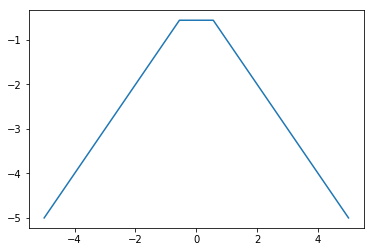

In [3]:
plt.plot(vec_h, vec_eigen)

In [4]:
N=1
[basis(2,0) for n in range(N)]

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]]]